# Assignment : iNeuron Visualization 2

Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:

1.fitting it to the periodic function

2.plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [26]:
from scipy.optimize import curve_fit
from scipy import optimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

months = list(range(1,13))
temp_maxi = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
temp_mini = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

def temp_year(times, avg, ampl, time_offset):
     return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(temp_year, months,temp_maxi, [40, 20,0])
res_min, cov_min = optimize.curve_fit(temp_year, months,temp_mini, [-40, 20,0])

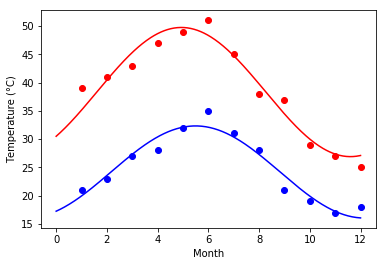

In [27]:
days = np.linspace(0, 12, num=365)
plt.figure()

plt.plot(months,temp_maxi, 'ro')
plt.plot(days, temp_year(days, *res_max), 'r-')
plt.plot(months,temp_mini, 'bo')
plt.plot(days, temp_year(days, *res_min), 'b-')

plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [28]:
data = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


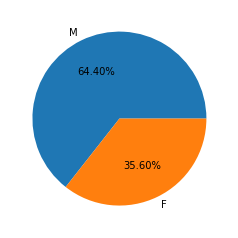

In [43]:
# 1. Create a pie chart presenting the male/female proportion
labels = ['M','F']
proptn = data.sex.value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(proptn, labels=labels, autopct='%1.2f%%')
plt.show()

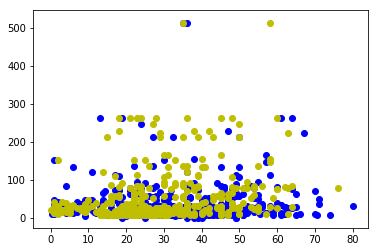

In [44]:
# 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
class_ = ['male','female']
colors = ['b','y']
for class__,color in zip(class_,colors):
    df_ = data[data['sex'] == class__]
    plt.scatter(df_.age, df_.fare,color = color)